In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from tensorflow.python.data import Dataset
import keras
from keras.utils import to_categorical
from keras import models
from keras import layers

In [16]:
beer = "C:/Users/bryan_j7mwyoj/Desktop/Final Project/Beer-Analysis/beers-cleaned.csv"
brewery = "C:/Users/bryan_j7mwyoj/Desktop/Final Project/Beer-Analysis/breweries (1).csv"
geocode = "C:/Users/bryan_j7mwyoj/Desktop/Final Project/Beer-Analysis/breweries_geocode.csv"
category = "C:/Users/bryan_j7mwyoj/Desktop/Final Project/Beer-Analysis/categories.csv"
style = "C:/Users/bryan_j7mwyoj/Desktop/Final Project/Beer-Analysis/styles.csv"
brews_pubs = "C:/Users/bryan_j7mwyoj/Desktop/Final Project/Beer-Analysis/BreweriesPubsUSA.csv"

In [17]:
beer = pd.read_csv(beer, encoding='ISO-8859-1')
brewery = pd.read_csv(brewery, encoding='ISO-8859-1')
geocode = pd.read_csv(geocode, encoding='ISO-8859-1')
category = pd.read_csv(category, encoding='ISO-8859-1')
style = pd.read_csv(style, encoding='ISO-8859-1')
brews_pubs = pd.read_csv(brews_pubs, encoding='ISO-8859-1')

C:\Users\bryan_j7mwyoj\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10,18,19,20,21,23,25,33,34,36,38,46,48,50,58,60,62,70,72,74,82,84,86,94,96,98,106,108,110,118,120,122,130,132,134,144,146,154,156,158,166,168,170,178,180,182,190,192,194,202,204,206,214) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
beer.head()

,id,brewery_id,name,cat_id,style_id,abv,ibu,srm,upc,descript,...,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214
0,1,812,Hocus Pocus,11,116,4.5,10.0,0.0,0,Our take on a classic summer ale. A toast to ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,264,Grimbergen Blonde,-1,-1,6.7,10.0,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,779,Widdershins Barleywine,-1,-1,9.1,10.0,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,287,Lucifer,-1,-1,8.5,10.0,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1056,Bitter,-1,-1,4.0,10.0,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
brewery.head()

,id,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
0,1,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,2,21st Amendment Brewery Cafe,563 Second Street,NaN,San Francisco,California,94107,United States,1-415-369-0900,http://www.21st-amendment.com/,NaN,The 21st Amendment Brewery offers a variety of...,2010-10-24 13:54:07
2,3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,NaN,Beersel,Vlaams Brabant,NaN,Belgium,32-02-/-306-71-03,http://www.3fonteinen.be/index.htm,NaN,NaN,2010-07-22 20:00:20
3,4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,NaN,Drammen,NaN,NaN,Norway,47-32-26-60-00,http://www.aass.no,NaN,Aass Brewery was established in 1834 and is th...,2010-07-22 20:00:20
4,5,Abbaye de Leffe,Dinant,NaN,Dinant,Namur,NaN,Belgium,NaN,NaN,NaN,NaN,2010-07-22 20:00:20


In [20]:
geocode.head()

,id,brewery_id,latitude,longitude,accuracy
0,1,1,30.2234,-97.7697,ROOFTOP
1,2,2,37.7825,-122.3930,ROOFTOP
2,3,3,50.7668,4.3081,RANGE_INTERPOLATED
3,4,4,59.7451,10.2135,APPROXIMATE
4,5,5,50.2606,4.9122,APPROXIMATE


In [21]:
category.head()

,id,cat_name
0,-1,Unique
1,1,British Ale
2,2,Irish Ale
3,3,North American Ale
4,4,German Ale


In [22]:
style.head()

,id,cat_id,style_name,Description,ABV_Low,ABV_High,IBU_low,IBU_High,SRM_Low,SRM_High,OG_Low,OG_High,FG_Low,FG_High,Glass Type
0,1,1,Classic English-Style Pale Ale,Classic English pale ales are golden to copper...,4.5,5.5,20,40,5.0,5.0,NaN,NaN,1.008,1.016,Stein
1,2,1,English-Style India Pale Ale,Most traditional interpretations of English-st...,5.0,7.0,35,63,6.0,14.0,NaN,NaN,1.012,1.018,Nonic Pint
2,3,1,Ordinary Bitter,Ordinary bitter is gold to copper colored with...,3.0,4.1,20,35,5.0,12.0,NaN,NaN,1.006,1.012,Nonic Pint
3,4,1,Special Bitter or Best Bitter,Special bitter is more robust than ordinary bi...,4.1,4.8,28,40,6.0,14.0,NaN,NaN,1.006,1.012,Nonic Pint
4,5,1,Extra Special Bitter,Extra special bitter possesses medium to stron...,4.8,5.8,30,45,8.0,14.0,NaN,NaN,1.010,1.016,Nonic Pint


In [24]:
X = style.ABV_High.values.reshape(-1, 1)
y = style.IBU_High.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (141, 1) (141, 1)


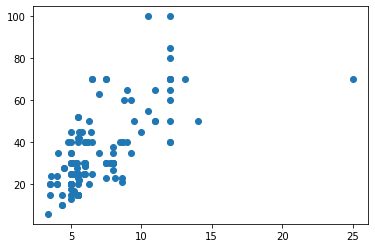

In [25]:
plt.scatter(X, y)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[4.5157204]]
y-axis intercept:  [3.58186107]


In [29]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[3.4]]
Max X Value: [[25.]]


In [30]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

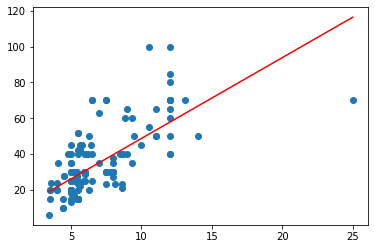

In [31]:
plt.scatter(X, y)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c = 'red')

In [38]:
X2 = style.ABV_Low.values.reshape(-1, 1)
y2 = style.IBU_low.values.reshape(-1, 1)
print("Shape: ", X.shape, y.shape)

Shape:  (141, 1) (141, 1)


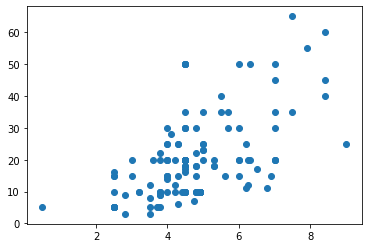

In [39]:
plt.scatter(X2, y2)

In [40]:
model2 = LinearRegression()

In [41]:
model2.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
print('Weight coefficients: ', model2.coef_)
print('y-axis intercept: ', model2.intercept_)

Weight coefficients:  [[5.22149532]]
y-axis intercept:  [-4.81870017]


In [43]:
x_min2 = np.array([[X2.min()]])
x_max2 = np.array([[X2.max()]])
print(f"Min X Value: {x_min2}")
print(f"Max X Value: {x_max2}")

Min X Value: [[0.5]]
Max X Value: [[9.]]


In [45]:
y_min2 = model2.predict(x_min2)
y_max2 = model2.predict(x_max2)

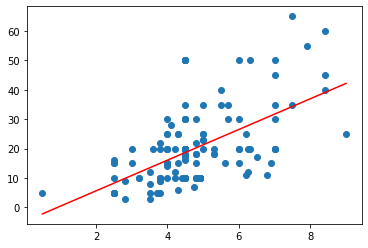

In [46]:
plt.scatter(X2, y2)
plt.plot([x_min2[0], x_max2[0]], [y_min2[0], y_max2[0]], c = 'red')

In [49]:
X3 = beer.abv
y3 = beer.ibu.values.reshape(-1,1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3)